# iris 데이터 시각화

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# from sklearn.datasets import load_iris # skleran의 샘플데이터

mpl.rc('font', family='Malgun Gothic')

In [24]:
df1 = sns.load_dataset('iris')
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df1['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### 연속형 변수 상자 그림

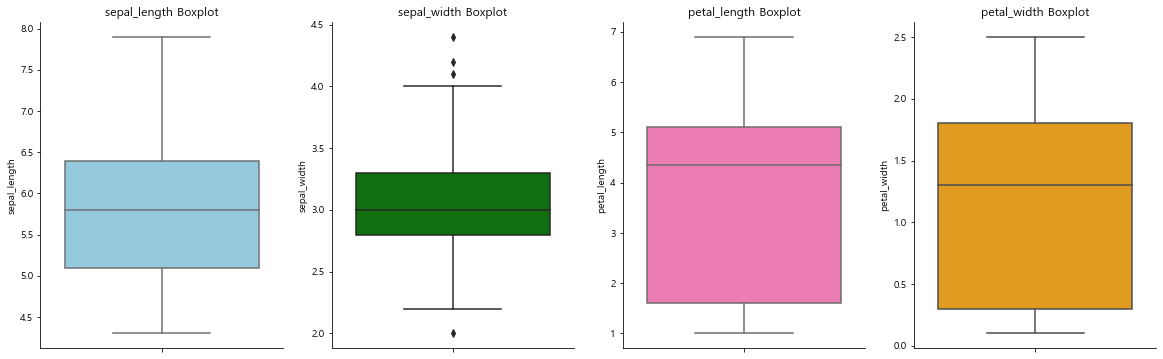

In [6]:
fig, ax = plt.subplots(1, 4) # 화면 분할
fig.set_size_inches(20, 6)

sns.boxplot(data=df1, y = 'sepal_length', color = 'skyblue', ax=ax[0])
sns.boxplot(data=df1, y = 'sepal_width', color = 'green', ax=ax[1])
sns.boxplot(data=df1, y = 'petal_length', color = 'hotpink', ax=ax[2])
sns.boxplot(data=df1, y = 'petal_width', color = 'orange', ax=ax[3])

sns.set_style('white')
sns.despine() # 그래프 테두리(top, right) 제거

for i in range(4):
    col = df1.columns[i]
    ax[i].set(title = f'{col} Boxplot')

**[결과]**

- 꽃받침 너비: 극단값이 아래에 한 개, 위에 세 개가 존재한다. 중앙값이 상자 거의 중앙에 위치하여 좌우 대칭인 분포를 띄고 있음을 알 수 있다.
- 꽃받침 길이: 극단값이 없으며 중앙값이 상자 거의 중앙에 위치하여 좌우 대칭인 분포를 띄고 있음을 알 수 있다. 
- 꽃잎 너비: 중앙값이 상자 위쪽에 위치한 것으로 보아 데이터가 큰 값이 많이 분포하고 있음을 알 수 있다.
- 꽃잎 길이: 중앙값이 상자 위쪽에 위치한 것으로 보아 데이터가 큰 값이 많이 분포하고 있음을 알 수 있다. 꽃잎 너비와 비슷한 분포를 갖는다.

### 연속형 변수 히스토그램

#### 방법1

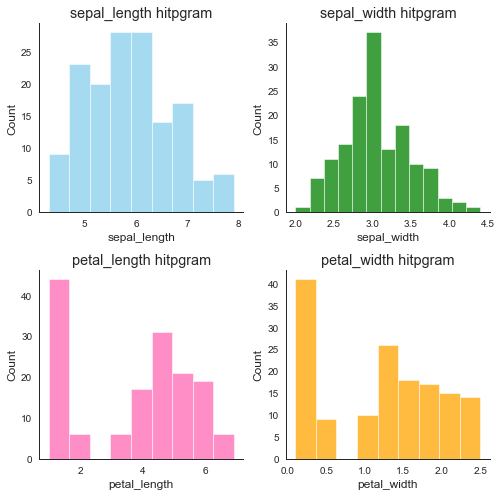

In [21]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(7, 7)

sns.set_style('white')
sns.despine() # 그래프 테두리(top, right) 제거

sns.histplot(data=df1, x = 'sepal_length', color = 'skyblue', ax=ax[0][0])
sns.histplot(data=df1, x = 'sepal_width', color = 'green', ax=ax[0][1])
sns.histplot(data=df1, x = 'petal_length', color = 'hotpink', ax=ax[1][0])
sns.histplot(data=df1, x = 'petal_width', color = 'orange', ax=ax[1][1])

ax[0][0].set(title = 'sepal_length hitpgram')
ax[0][1].set(title = 'sepal_width hitpgram')
ax[1][0].set(title = 'petal_length hitpgram')
ax[1][1].set(title = 'petal_width hitpgram')
            
plt.tight_layout() # 그래프 사이 간격 조정

방법1은 히스토그램을 변수별로 한 줄의 코드씩 작성했다.

지금은 데이터 수가 적아서 한 줄 작성하고 복사, 붙여넣기 해도 되지만 더 많은 데이터를 시각화할 때는 무리가 있다.

따라서 아래 방법을 이용해서 좀 더 간단하게 그릴 수 있다.

#### 방법2

In [9]:
# 컬럼 이름 변수 설정
col_list = df1.columns[:4].tolist()
print(col_list)

col2 = np.array(col_list).reshape(2,2)
print(col2)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
[['sepal_length' 'sepal_width']
 ['petal_length' 'petal_width']]


In [10]:
# 색상 변수 설정
color_list = ['skyblue', 'green', 'hotpink', 'orange']

color = np.array(color_list).reshape(2,2)
color

array([['skyblue', 'green'],
       ['hotpink', 'orange']], dtype='<U7')

col_list를 배열 함수에 넣고 2 X 2 형식으로 차원을 변경한다.

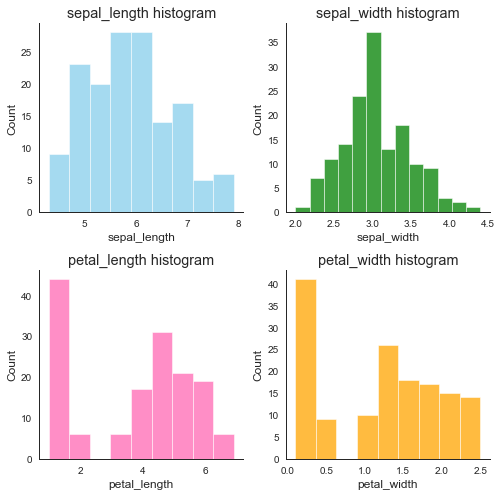

In [22]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(7, 7)

sns.set_style('white')
sns.despine()

for i in range(2):
    for j in range(2):
        sns.histplot(data=df1, x = col2[i, j], color = color[i,j], ax=ax[i,j])
        ax[i,j].set(title = f'{col2[i,j]} histogram')

plt.tight_layout() # 그래프 사이 간격 조정

위의 코드에서 **[ i , j ]** 외에 **[ i ][ j ]** 라고 표기해도 동일한 결과가 나온다.

**[결과]**

- 꽃받침 너비(Sepal.Width): 히스토그램의 분포가 정규분포와 비슷하다. 
- 꽃받침 길이(Sepal.Length): 4.5~7cm의 길이를 갖는 꽃받침이 많다.
- 꽃잎 너비(Petal.Width): 1cm 이하의 너비가 많이 있으며 최대가 약 3cm이다.
- 꽃잎 길이(Petal.Length): 1-2cm가 많이 분포하며 그 이상으로는 4-5cm가 많다.
- 종(Speicies): 3가지 종류가 있으며 각 개수가 50개로 모두 동일하다.

### 여러 변수 간 산점도 그리기

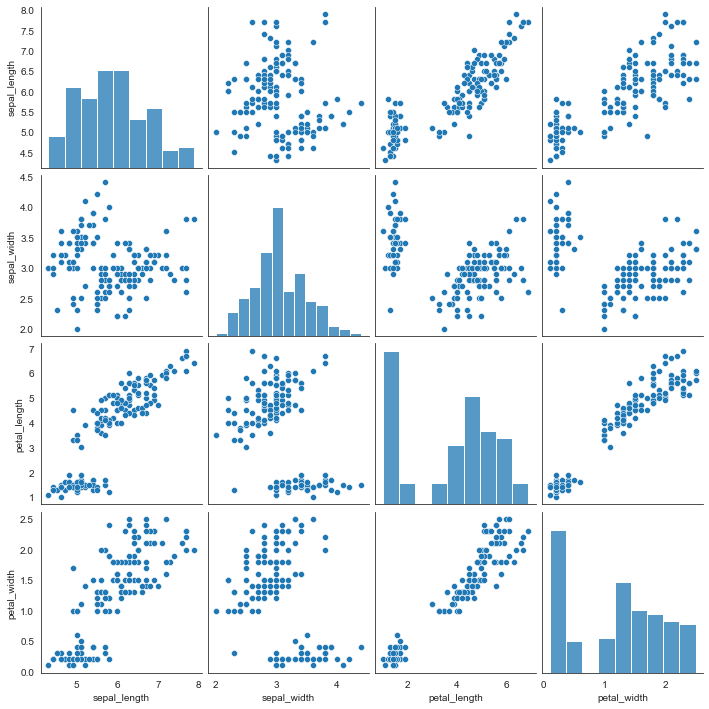

In [12]:
sns.pairplot(df1)

**[결과]**

다른 변수 간에는 연관성이 보이지 않지만 petal_width와 petal_length , 그리고 sepal_length와 petal_width 변수간에 상관관계가 있음을 알 수 있다.

두 변수쌍의 산점도를 자세히 살피변 다음과 같다.

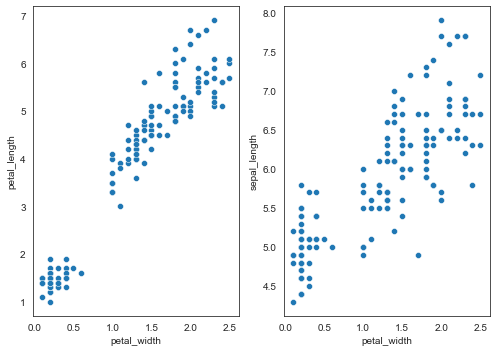

In [13]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(7, 5)

plt.style.use('ggplot')
sns.scatterplot(data=df1, x='petal_width', y= 'petal_length', ax = ax[0])
sns.scatterplot(data=df1, x='petal_width', y= 'sepal_length', ax = ax[1])

plt.tight_layout()

### 상관분석

In [14]:
# petal_width와 petal_length
df1['petal_width'].corr(df1['petal_length'])

0.9628654314027961

In [15]:
# sepal_length와 petal_width
df1['sepal_length'].corr(df1['petal_width'])

0.8179411262715757

상관분석 결과, 각각 상관계수가 약 0.963, 약 0.818로 높은 양의 상관관계를 갖는다는 결과를 얻었다.

### fig, ax = plt.subplots()
### fig.set_size_inches()

#### 와

### fig = plt.figure(figsize=())
### ax = fig.add_subplot()

#### 의 차이점

표현상의 차이가 있을 뿐이고 Matplotlib와 Seaborn에 모두 적용된다.

<AxesSubplot:ylabel='sepal_width'>

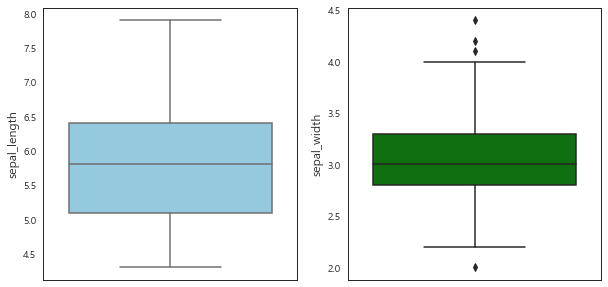

In [57]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 5)

sns.boxplot(data=df1, y = 'sepal_length', color = 'skyblue', ax = ax[0])
sns.boxplot(data=df1, y = 'sepal_width', color = 'green', ax = ax[1])

<AxesSubplot:ylabel='sepal_width'>

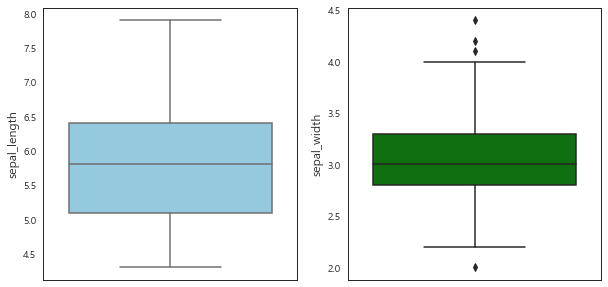

In [58]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.boxplot(data=df1, y = 'sepal_length', color = 'skyblue', ax = ax1)
sns.boxplot(data=df1, y = 'sepal_width', color = 'green', ax = ax2)